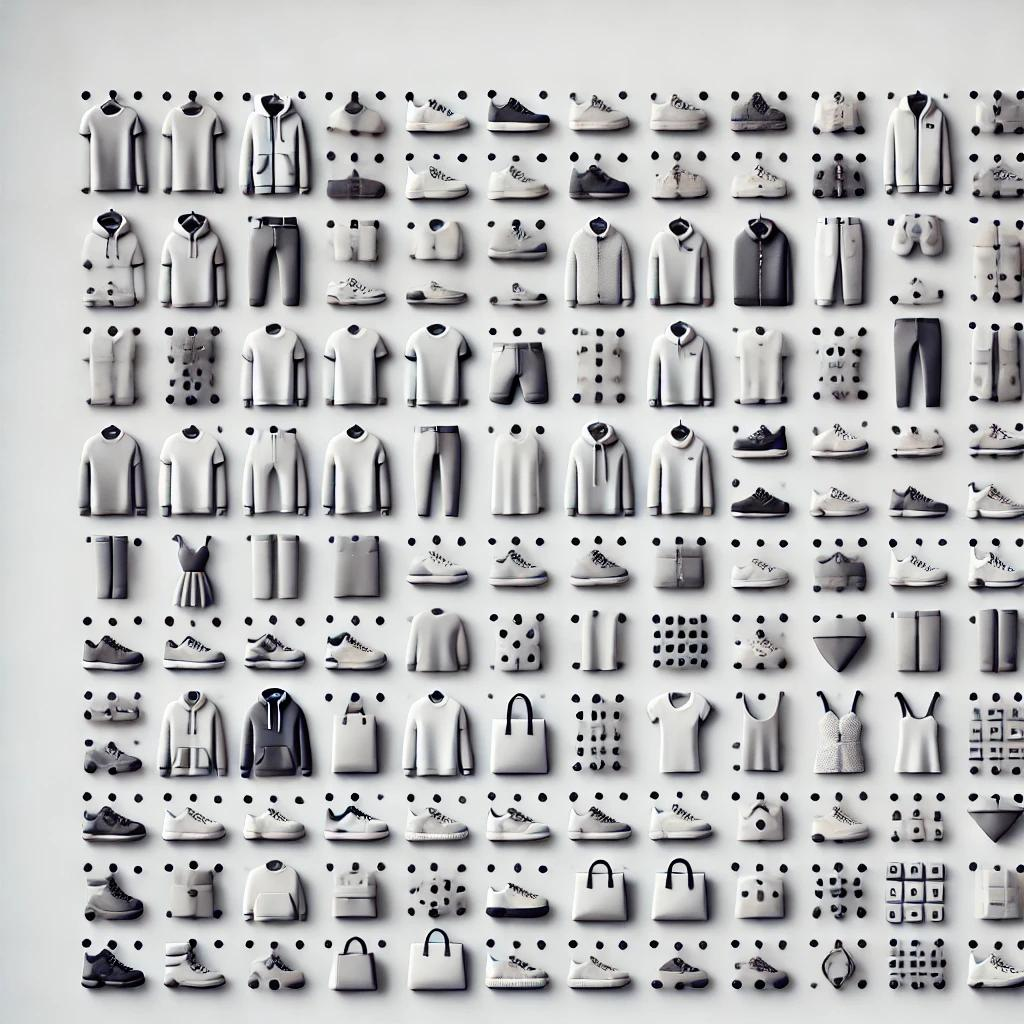

# 1. Project Description

The Fashion MNIST dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. I used supervised learning models to analyze the MNIST dataset. For the test set, I created a very small dataset by taking 5 images from my apparel collection to test the algorithms. The test set is just an example to demonstrate how unseen data can be plugged into the algorithms. You can use any other dataset to replace mine.

# 2. Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.simplefilter(action="ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# !pip install --upgrade tensorflow

#### Check the version of tensorflow

In [3]:
tf.__version__

'2.17.0'

# 3. Load the dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


#### As we can see, the training dataset (X_train) contains 60,000 images, each of size 28 x 28. We can visualize one of the images using 
#### the following code:

cmap='binary' is a colormap that displays the image in black and white (binary colors). It maps the pixel values to a range between black and white, where typically:
0 values (black) represent the absence of intensity.
1 values (white) represent the highest intensity.
Intermediate values are represented in varying shades of gray.

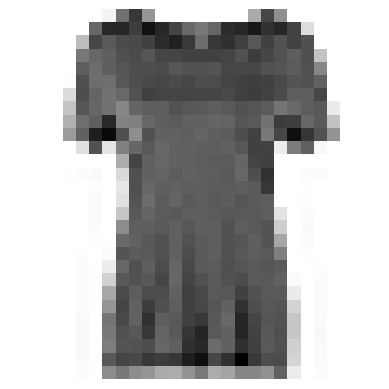

In [6]:
sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

#### The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [7]:
y_train[10]

0

#### The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [8]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


# 4. Process Flow
I used the training set to train various supervised models and evaluated their performance using the test set, applying different supervised learning models. I used metrics such as accuracy, precision, AUC, and others for model evaluation.
Next, I applied some of the supervised learning algorithms to my dataset to determine the accuracy. Since my dataset is very small (only 5 pictures), I am curious to see how well the algorithms correctly identify the items. You can replace the test set with any unseen related dataset and see how the algorithms perform.
I took pictures of five fashion items from my collection (in square format), resized the images to the correct size (28x28), converted them to grayscale, and visualized all the images side by side. 


# Part 1: Analysis 

Before starting the project, data were flattend to further analysis.

Here is the list of models that were used for analysis:

1. Logistic Regression
2. SGDClassifier
3. KNN
4. Naive Bayes
5. SVM
6. Decision Tree
7. Random Forest
8. Neural Network

Upon completing above classifiers, the Accuracy score, macro average, weighted avaerage with additional information about some of models were extracted and then, personal apparel data were used to see the accuracy and other measurements, using all models except SVM which has poor accuracy. 

 # 5. Flatten X_train and X_test 

Explanation of X_train.shape[0]:

X_train.shape returns the shape (dimensions) of the X_train array as a tuple. For example, if X_train is the training set for the MNIST dataset, it might have a shape like (60000, 28, 28).
The first dimension (shape[0]) is the number of samples or images (e.g., 60000 training examples).
The second and third dimensions (shape[1] and shape[2]) are the height and width of each image (e.g., 28x28 pixels for MNIST images).

In [9]:
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

print("X_train.shape:" , X_train.shape)
print("y_train.shape:" , y_train.shape)
print()
print("X_test.shape:" , X_test.shape)
print("y_test.shape:" , y_test.shape)

X_train.shape: (60000, 784)
y_train.shape: (60000,)

X_test.shape: (10000, 784)
y_test.shape: (10000,)


# 5.1. Example of Training Digits and their Labels

X_train[0:5] and y_train[0:5]: Select the first 5 images and their labels from the training set.

zip(X_train[0:5], y_train[0:5]): Combines the images and labels into pairs, so you can iterate over both simultaneously.

enumerate(...): Adds an index (starting at 0) to each pair for tracking the current position in the loop.

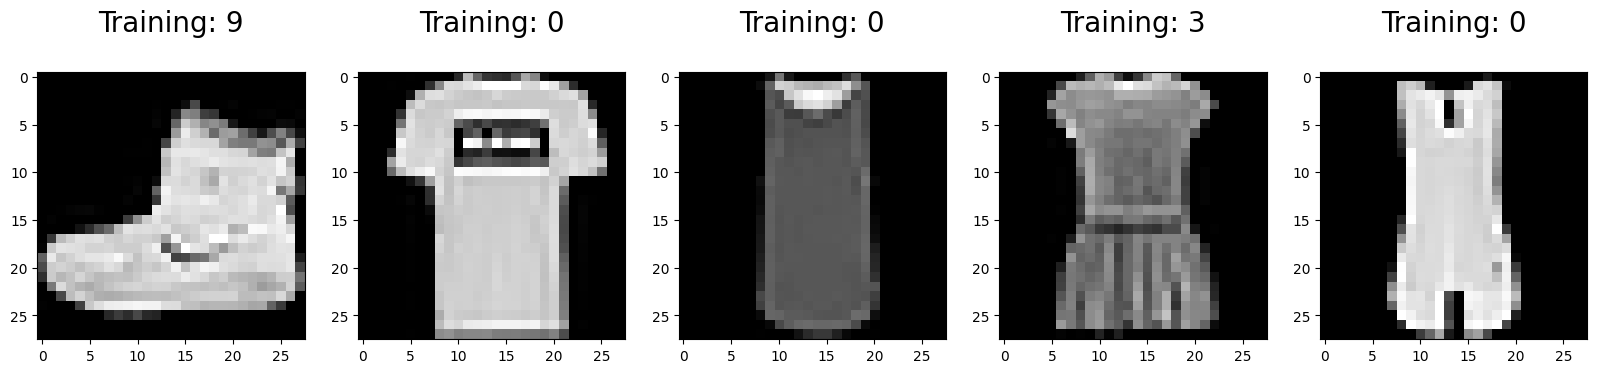

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# 6. Normalize the data

In [11]:
Scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = Scaler.fit_transform(X_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 7. Algorithm's Analysis

## 7.1. Logistic Regression

accuracy:  73.96
Classification report and confusion matrix


              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1000
           1       0.92      0.97      0.94      1000
           2       0.76      0.53      0.62      1000
           3       0.90      0.72      0.80      1000
           4       0.45      0.96      0.62      1000
           5       1.00      0.46      0.63      1000
           6       0.61      0.25      0.36      1000
           7       0.85      0.82      0.83      1000
           8       0.89      0.96      0.92      1000
           9       0.64      0.99      0.78      1000

    accuracy                           0.74     10000
   macro avg       0.79      0.74      0.73     10000
weighted avg       0.79      0.74      0.73     10000



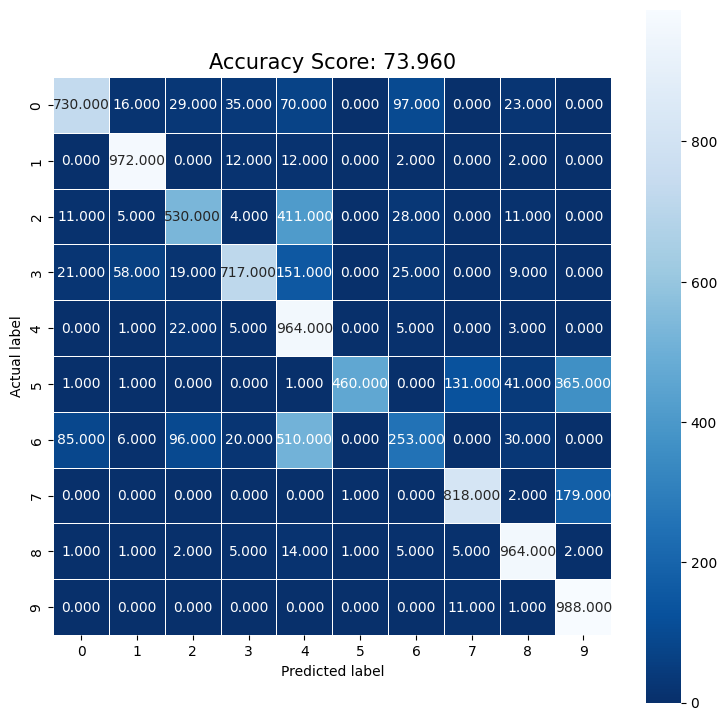

In [12]:
best_2_model = LogisticRegression(solver='lbfgs')
best_2_model.fit(X_scaled, y_train)
y_test_hat = best_2_model.predict(X_test)

accuracy = accuracy_score(y_test,y_test_hat, normalize = True) * 100 
print("accuracy: ",accuracy.round(4))

print("Classification report and confusion matrix")

cm = confusion_matrix(y_test,y_test_hat)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy) 
plt.title(all_sample_title, size = 15);

print()
print()
print(classification_report(y_test,y_test_hat))

### 7.1.1. Display Misclassified images with Predicted Labels

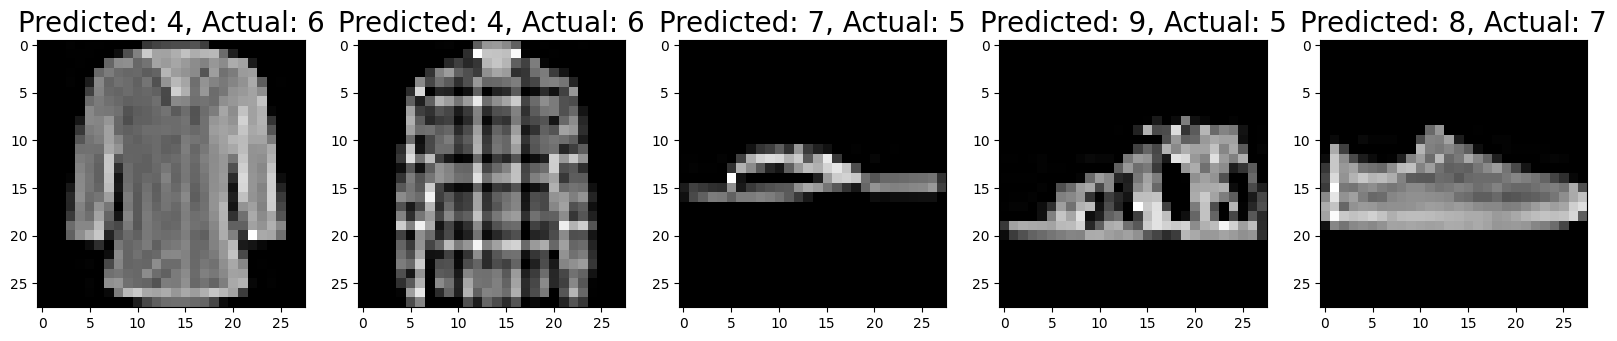

In [13]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_test_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_test_hat[badIndex], y_test[badIndex]), fontsize = 20)

## 7.2. SGDClassifier


                  Out of sample data               
Accuracy:  97.28

Classification report and confusion matrix of subset of dataset


              precision    recall  f1-score   support

           0       1.00      0.11      0.20      9000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       0.90      0.10      0.18     10000



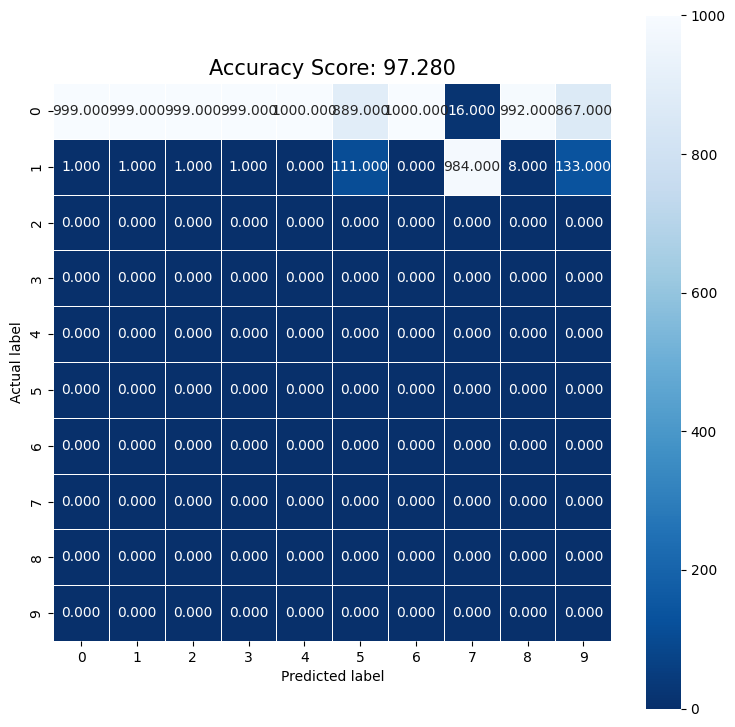

In [14]:
label = np.random.randint(0, 10)

y_sample_train = (y_train == label)
y_sample_test = (y_test == label)
print()


y = y_train.astype(np.uint8)

SGDmodel = SGDClassifier()
SGDmodel.fit(X_scaled, y_sample_train)
y_sample_test_hat = SGDmodel.predict(X_test)

print("                  Out of sample data               ")
x = accuracy_score(y_sample_test,y_sample_test_hat, normalize = True) * 100 
print("Accuracy: ", x.round(3))
print()

print("Classification report and confusion matrix of subset of dataset")

cm = confusion_matrix(y_sample_test_hat,y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(x) 
plt.title(all_sample_title, size = 15);

print()
print()
print(classification_report(y_sample_test,y_test))

#### Classification report and confusion matrix on the entire dataset 

## 7.3. KNN Model

In [15]:
table = []
for k in range(2,8):
    print("\033[1m K = \033[0m", k)
    best_1_model = KNeighborsClassifier(n_neighbors=k)
    best_1_model.fit(X_scaled, y_train)
    y_test_predd = best_1_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_predd, normalize=True) * 100
    print("Accuracy score: ", accuracy)
    table.append((k, accuracy))
    print()
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_test_predd))

 K =  2
Accuracy score:  27.82

              precision    recall  f1-score   support

           0       0.54      0.70      0.61      1000
           1       0.79      0.33      0.47      1000
           2       0.20      0.97      0.33      1000
           3       0.65      0.08      0.15      1000
           4       0.59      0.08      0.14      1000
           5       1.00      0.00      0.00      1000
           6       0.18      0.01      0.02      1000
           7       0.00      0.00      0.00      1000
           8       0.13      0.35      0.19      1000
           9       0.59      0.26      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.47      0.28      0.23     10000
weighted avg       0.47      0.28      0.23     10000

 K =  3
Accuracy score:  31.130000000000003

              precision    recall  f1-score   support

           0       0.49      0.73      0.59      1000
           1       0.84      0.39      0.54      1000
 

In [16]:
table
comp_table = pd.DataFrame(table, columns = ["K", "Accuracy"])
comp_table

,K,Accuracy
0,2,27.82
1,3,31.13
2,4,31.94
3,5,32.13
4,6,32.56
5,7,32.72


The KNN model was run for values of k ranging from 2 to 7. As seen from the results, increasing the value of 
k leads to a decrease in accuracy. The precision and recall values are very close to each other for each label.

## 7.4. Naive Bayes

Accuracy = 26.1 %
Classification report and confusion matrix


              precision    recall  f1-score   support

           0       0.90      0.31      0.46      1000
           1       0.00      0.00      0.00      1000
           2       0.08      0.09      0.08      1000
           3       0.19      0.05      0.07      1000
           4       0.00      0.00      0.00      1000
           5       0.32      0.70      0.44      1000
           6       0.18      0.69      0.28      1000
           7       0.00      0.00      0.00      1000
           8       0.35      0.78      0.49      1000
           9       0.40      0.00      0.01      1000

    accuracy                           0.26     10000
   macro avg       0.24      0.26      0.18     10000
weighted avg       0.24      0.26      0.18     10000



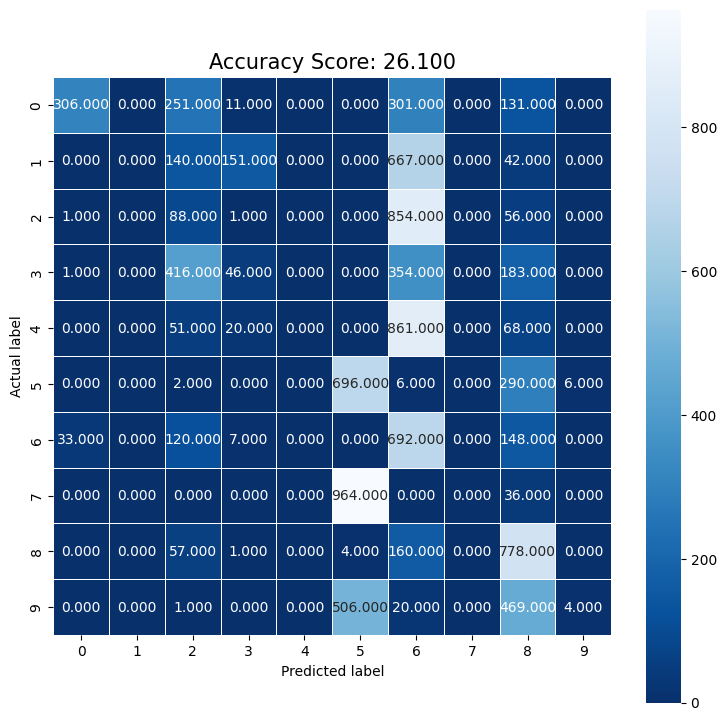

In [17]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_scaled, y_train)
y_predicted = naive_bayes_model.predict(X_test)

t = accuracy_score(y_test, y_predicted)*100
print ("Accuracy = {} %".format(t))


print("Classification report and confusion matrix")


cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(t) 
plt.title(all_sample_title, size = 15);

print()
print()
print(classification_report(y_test,y_predicted))

## 7.5. Decision Tree 

For this model, the maximum depth was first determined, and then the model was run again with the maximum depth value to check the accuracy.

In [18]:
# Find out max depth for model

DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(X_scaled, y_train)
y_test1  = DecisionTree_model.predict(X_test)
y_train_hat  = DecisionTree_model.predict(X_scaled)

param_grid = {'max_depth': [2,3,4,5,6,7,8]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(DecisionTree_model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')
grid.fit(X_scaled, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print()
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

print()
print()

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test1, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

Best Parameter: {'max_depth': 8}

Best Cross Vlidation Score: 0.7887166666666666


In-sample Accuracy:  100.0
Out-of-sample Accuracy:  36.8


#### Fix max_depth to 8 and find the accuracy of the model

In-sample Accuracy:  80.55666666666667
Out-of-sample Accuracy:  63.41
Classification report and confusion matrix


              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1000
           1       0.98      0.87      0.92      1000
           2       0.46      0.64      0.54      1000
           3       0.72      0.78      0.75      1000
           4       0.41      0.60      0.49      1000
           5       0.88      0.64      0.74      1000
           6       0.44      0.26      0.32      1000
           7       0.75      0.54      0.63      1000
           8       0.59      0.67      0.62      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000



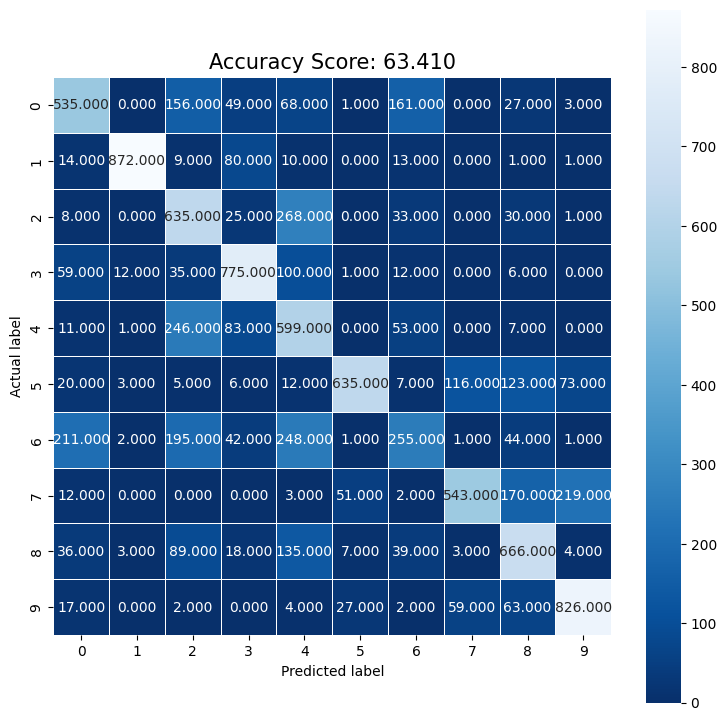

In [19]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_scaled, y_train)
y_train_h  = model.predict(X_scaled)
y_test_h  = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_h, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_h, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

print("Classification report and confusion matrix")


cm = confusion_matrix(y_test,y_test_h)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(out_of_sample_acc) 
plt.title(all_sample_title, size = 15);

print()
print()
print(classification_report(y_test,y_test_h))

## 7.6. Random Forest 

In [20]:
best_model = RandomForestClassifier(n_estimators=100, random_state=0)
best_model.fit(X_scaled,y_train)

y_trainhat  = best_model.predict(X_scaled)
y_testhat  = best_model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_trainhat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_testhat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

print(classification_report(y_test,y_testhat))

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  71.08
              precision    recall  f1-score   support

           0       0.72      0.27      0.39      1000
           1       0.97      0.92      0.95      1000
           2       0.50      0.73      0.59      1000
           3       0.83      0.81      0.82      1000
           4       0.47      0.43      0.45      1000
           5       0.98      0.85      0.91      1000
           6       0.30      0.41      0.35      1000
           7       0.86      0.84      0.85      1000
           8       0.93      0.90      0.91      1000
           9       0.84      0.94      0.89      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.71     10000
weighted avg       0.74      0.71      0.71     10000



## 7.7. Neural Networks

In [21]:
best_4_model = MLPClassifier(solver='lbfgs',random_state=0)
best_4_model.fit(X_scaled,y_train)

# Let's check the accuracy
y_train1_hat = best_4_model.predict(X_scaled)
y_test1_hat = best_4_model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train1_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test1_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print()
print("Out-of-sample Accuracy: ", out_of_sample_acc)

print()

print(classification_report(y_test,y_test1_hat))

In-sample Accuracy:  89.11

Out-of-sample Accuracy:  77.94

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.88      0.98      0.92      1000
           2       0.83      0.53      0.64      1000
           3       0.93      0.68      0.79      1000
           4       0.51      0.96      0.67      1000
           5       0.99      0.79      0.88      1000
           6       0.73      0.38      0.50      1000
           7       0.96      0.65      0.77      1000
           8       0.89      0.98      0.93      1000
           9       0.68      1.00      0.81      1000

    accuracy                           0.78     10000
   macro avg       0.82      0.78      0.77     10000
weighted avg       0.82      0.78      0.77     10000



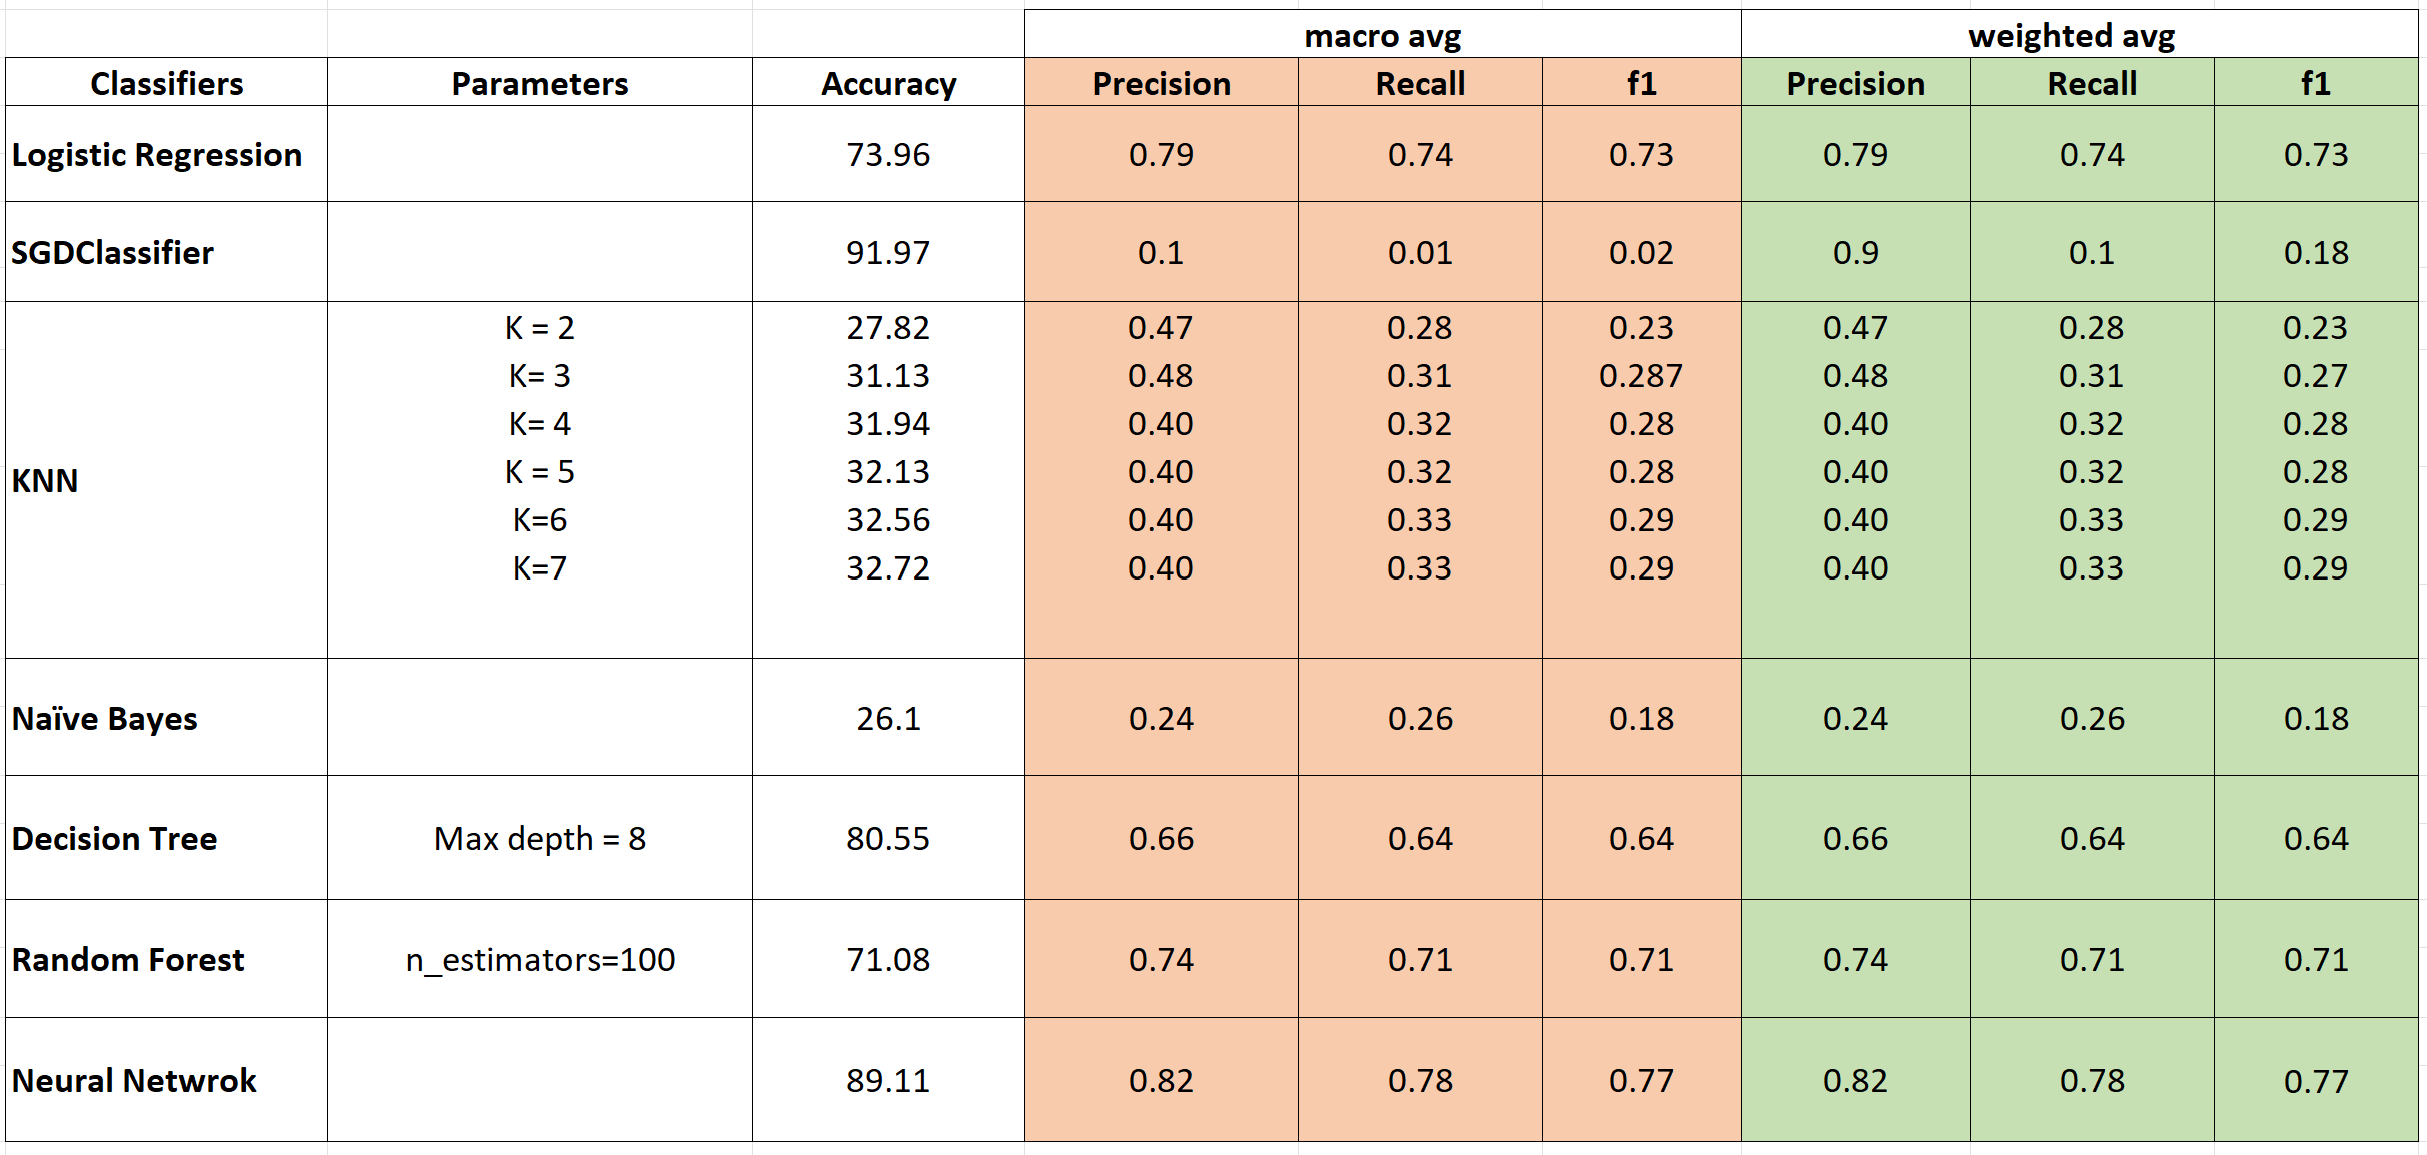

# Part 1 Conclusion

After running all models and framing the results in a table (as seen in the table above), we can see that the SGD classifier model is performing better than the others in terms of accuracy score.

# Part 2: Your created dataset

# 8. Process

Here, I applied some of the supervised learning algorithms to my dataset to determine the accuracy. Since my dataset is very small (only 5 pictures), I am curious to see how well the algorithms correctly identify the items. You can replace the test set with any unseen related dataset and see how the algorithms perform.
I took pictures of five fashion items from my collection (in square format), resized the images to the correct size (28x28), converted them to grayscale, and visualized all the images side by side. 

# 9. Import Test Set

In [22]:
image_1 = np.array(mpimg.imread("/kaggle/input/sample/Photos/Sandal.jpg"))
image_2 = np.array(mpimg.imread("/kaggle/input/sample/Photos/Shirt.jpg"))
image_3 = np.array(mpimg.imread("/kaggle/input/sample/Photos/Sneaker.jpg"))
image_4 = np.array(mpimg.imread("/kaggle/input/sample/Photos/T-shirt.jpg"))
image_5 = np.array(mpimg.imread("/kaggle/input/sample/Photos/Trouser.jpg"))

Image_1_Gray = image_1.mean(axis = 2)
Image_2_Gray = image_2.mean(axis = 2)
Image_3_Gray = image_3.mean(axis = 2)
Image_4_Gray = image_4.mean(axis = 2)
Image_5_Gray = image_5.mean(axis = 2)

# 10. Process Flow

## 10.1. Create list of images to convert to numpy 2D array

In [23]:
list_images = [Image_1_Gray,Image_2_Gray,Image_3_Gray,Image_4_Gray,Image_5_Gray]

In [24]:
N_X_test = np.array(list_images)

## 10.2. Reshaping array

In [25]:
N_X_test = N_X_test.reshape(5,28*28)
N_X_test.shape

(5, 784)

## 10.3. Indexing the peronal stuff based on class_names.

In [26]:
# class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

N_y_test = np.array([5,6,7,1,0])

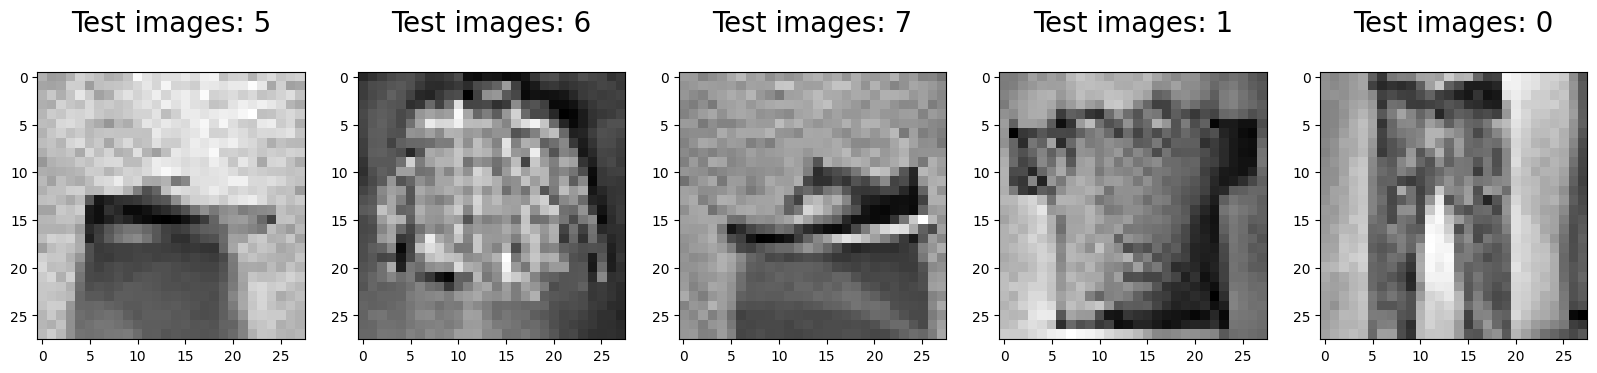

In [27]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(N_X_test[0:5], N_y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Test images: %i\n' % label, fontsize = 20)

# 11. Analysis
For this part of project ( try our aparel pictures), I used Random Forest, KNN with n = 5, Logitic Regression, SGD classifier and Neural Network models. For all of them I got the accuracy of zero. I think one reason could be the quality of picture which model is not able to recognize. Another reason could be size of test set which is 5 here. You see the results of all models below.
Then I used DecisionTree and Naive Bayes models and I got 20% of accuracy. I have shown all models accuracies below:

# 12. Applied Algorithms (LR, SGD Classifier, KNN, NB, DT, RF, and NN)

## 12.1. Logistic Regression 

In [28]:
y2_new_hat = best_2_model.predict(N_X_test)

out_of_sample = accuracy_score(y2_new_hat ,N_y_test, normalize = True) * 100

print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
from sklearn.metrics import classification_report
print(classification_report(N_y_test, y2_new_hat))

Out-of-sample Accuracy:  0.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



### Display Misclassified images with Predicted Labels

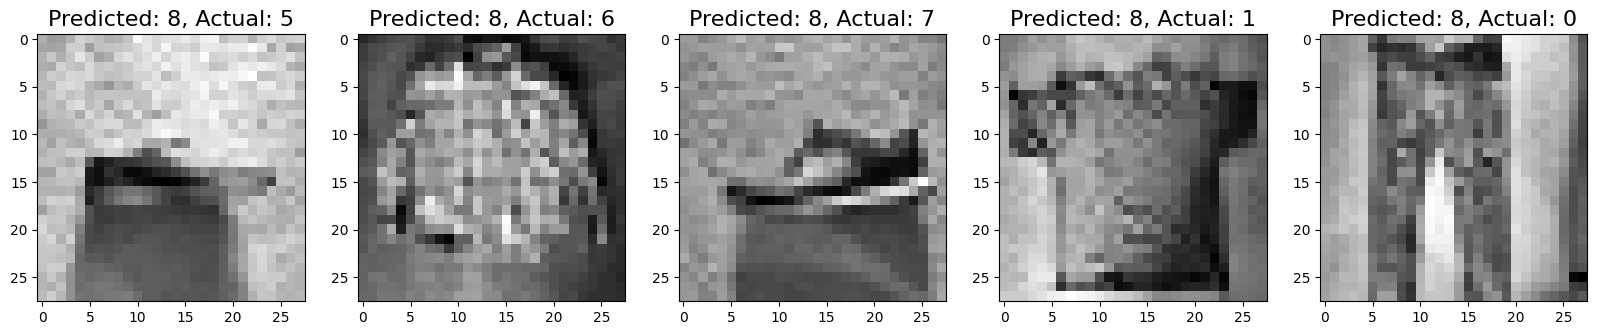

In [29]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y2_new_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y2_new_hat[badIndex], N_y_test[badIndex]), fontsize = 16)

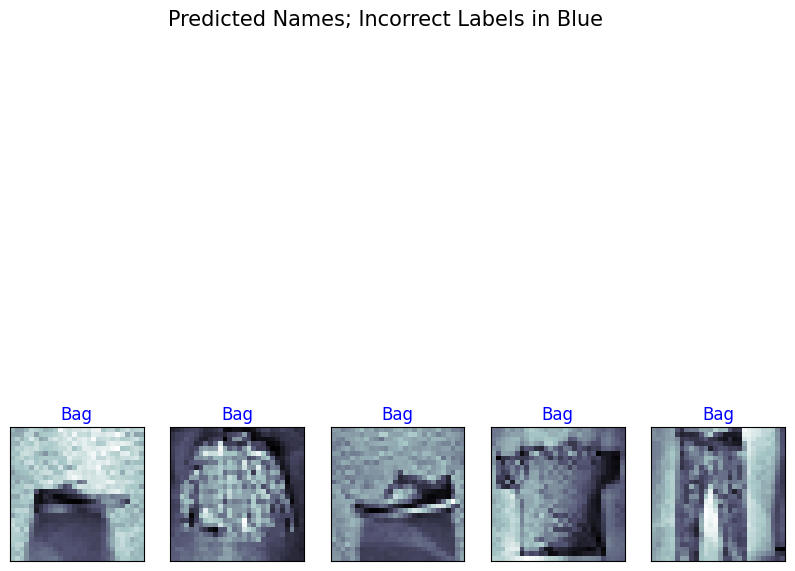

In [30]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y2_new_hat[i]]
                ,color='black' if y2_new_hat[i] == N_y_test[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

## 12.2. SGD  

In [31]:
y3_new_hat = SGDmodel.predict(N_X_test)

out_of_sample = accuracy_score(y3_new_hat ,N_y_test, normalize = True) * 100

print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
from sklearn.metrics import classification_report
print(classification_report(N_y_test, y3_new_hat))

Out-of-sample Accuracy:  20.0


              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.04      0.20      0.07         5
weighted avg       0.04      0.20      0.07         5



### Display Misclassified images with Predicted Labels

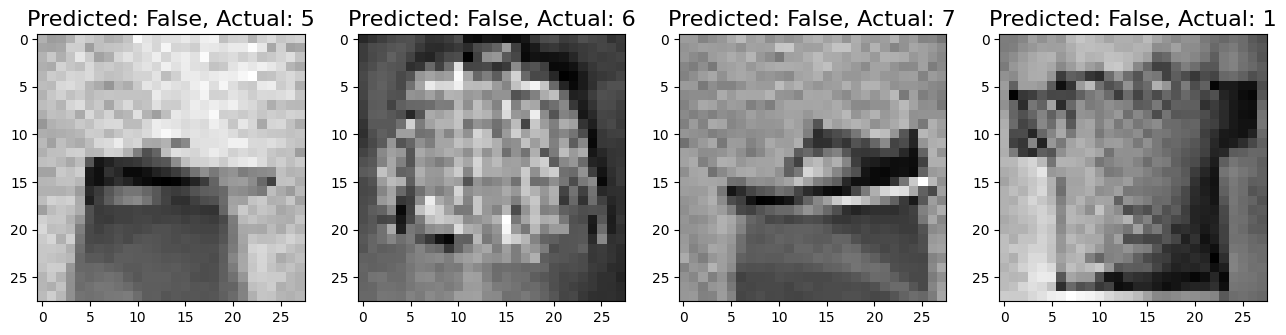

In [32]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y3_new_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y3_new_hat[badIndex], N_y_test[badIndex]), fontsize = 16)

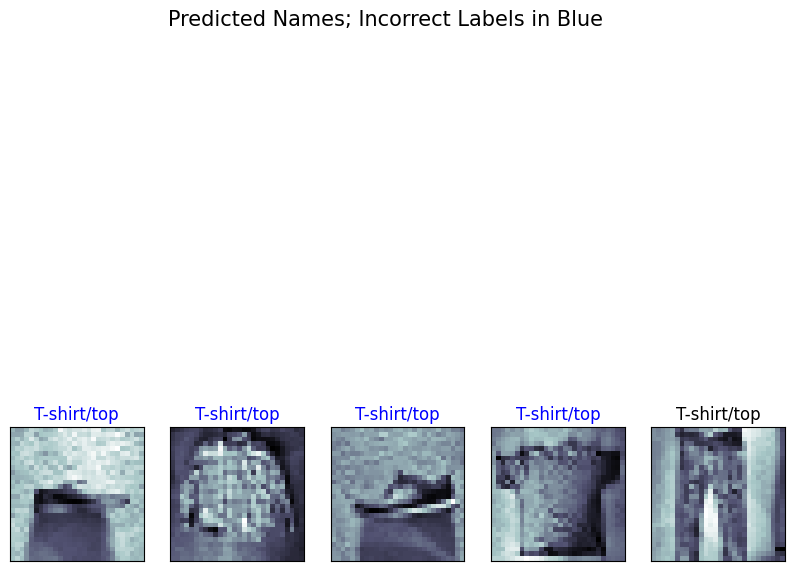

In [33]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y3_new_hat[i]]
                ,color='black' if y3_new_hat[i] == N_y_test[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

## 12.3. KNN 

In [34]:
y1_new_hat = best_1_model.predict(N_X_test)

from sklearn.metrics import accuracy_score
out_of_sample = accuracy_score(y1_new_hat ,N_y_test, normalize = True) * 100

print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
from sklearn.metrics import classification_report
print(classification_report(N_y_test, y1_new_hat))

Out-of-sample Accuracy:  0.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



### Display Misclassified images with Predicted Labels

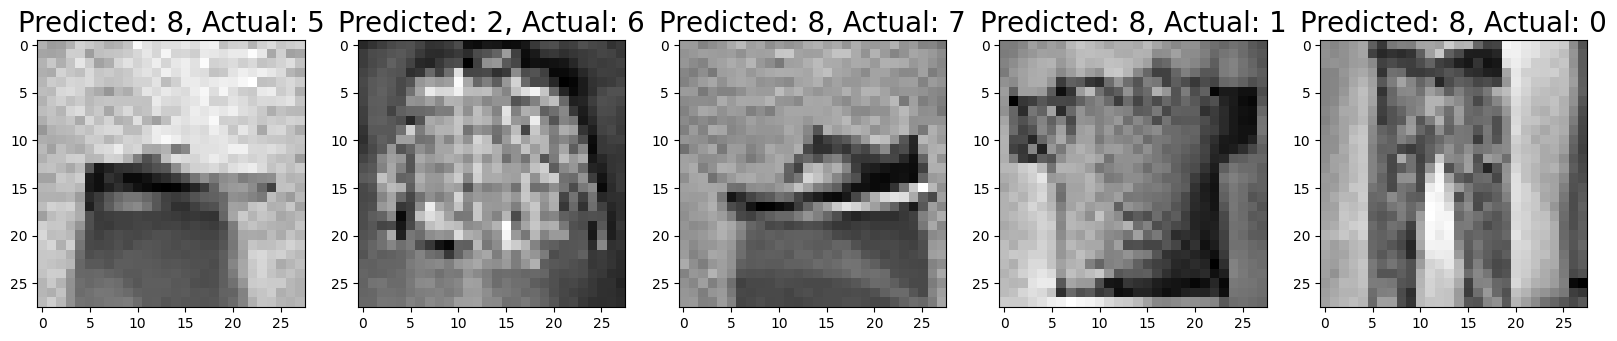

In [35]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y1_new_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y1_new_hat[badIndex], N_y_test[badIndex]), fontsize = 20)

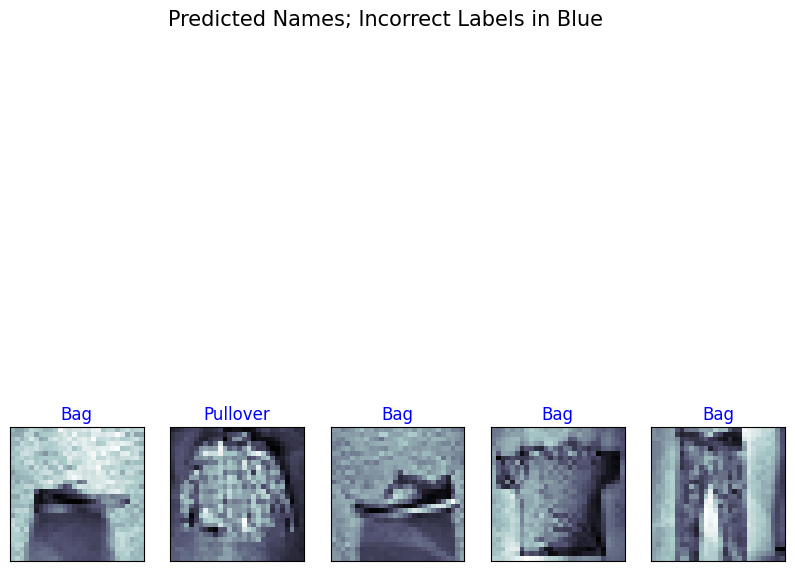

In [36]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y1_new_hat[i]]
                ,color='black' if y1_new_hat[i] == N_y_test[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

## 12.4. Naive Bayes

In [37]:
y6_new_hat = naive_bayes_model.predict(N_X_test)

out_of_sample = accuracy_score(y6_new_hat ,N_y_test, normalize = True) * 100

print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
from sklearn.metrics import classification_report
print(classification_report(N_y_test, y6_new_hat))

Out-of-sample Accuracy:  0.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



### Display Misclassified images with Predicted Labels

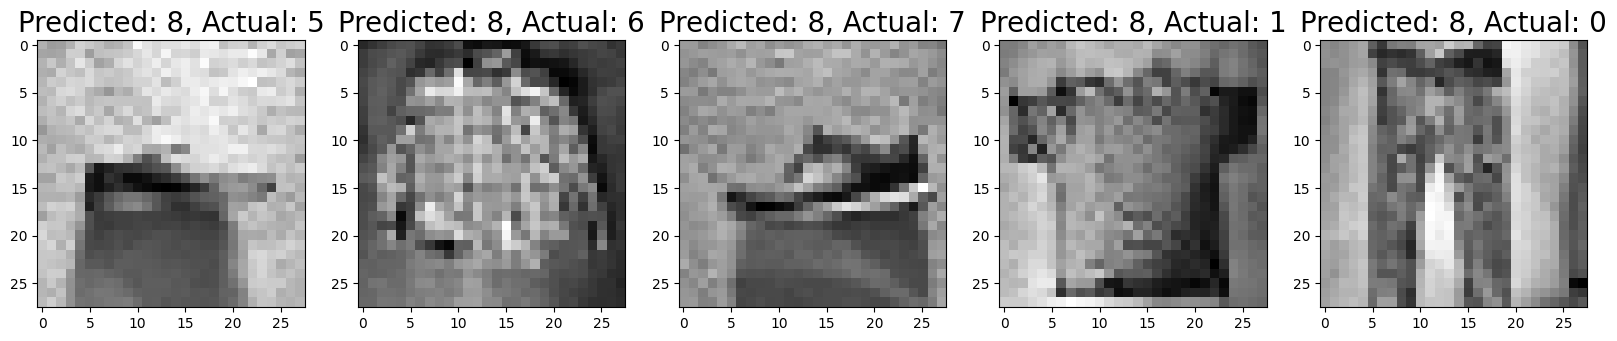

In [38]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y6_new_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y6_new_hat[badIndex], N_y_test[badIndex]), fontsize = 20)

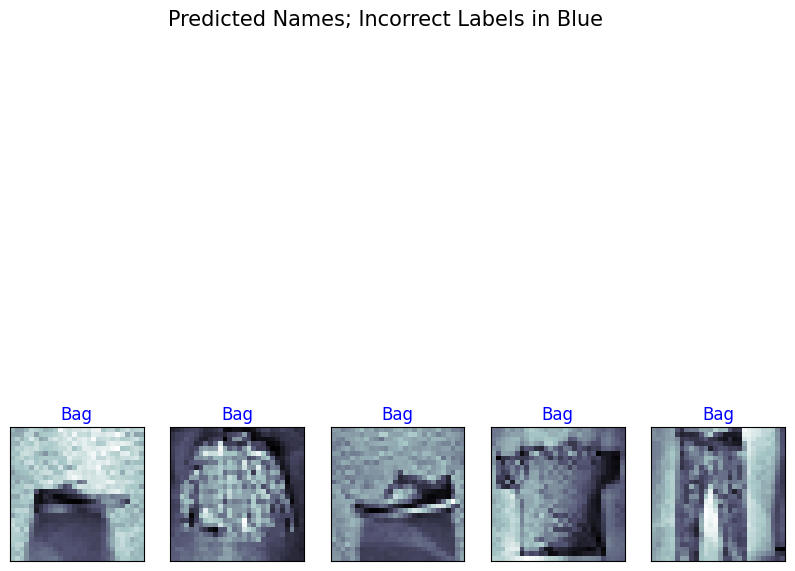

In [39]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y6_new_hat[i]]
                ,color='black' if y6_new_hat[i] == N_y_test[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

## 12.5. Decision Tree 

In [40]:
y5_new_hat = DecisionTree_model.predict(N_X_test)

out_of_sample = accuracy_score(y5_new_hat ,N_y_test, normalize = True) * 100

print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
from sklearn.metrics import classification_report
print(classification_report(N_y_test, y5_new_hat))

Out-of-sample Accuracy:  20.0


              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.04      0.20      0.07         5
weighted avg       0.04      0.20      0.07         5



### Display Misclassified images with Predicted Labels

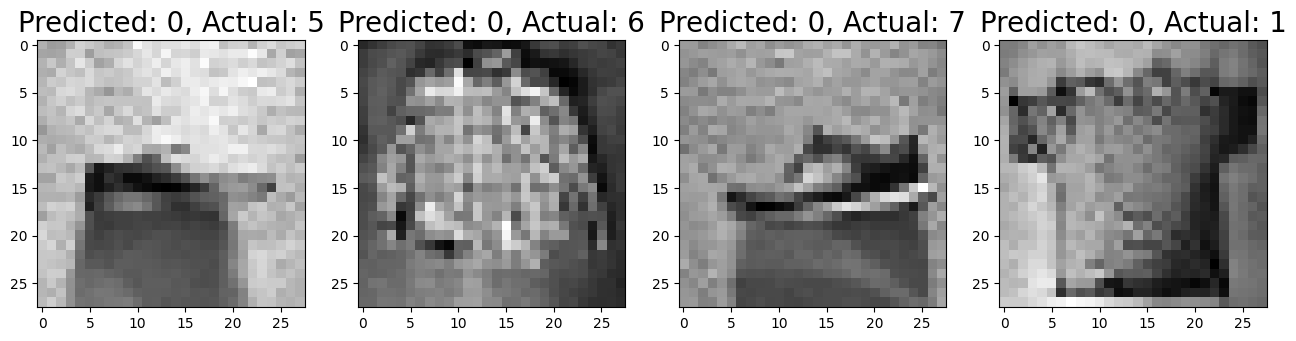

In [41]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y5_new_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y5_new_hat[badIndex], N_y_test[badIndex]), fontsize = 20)

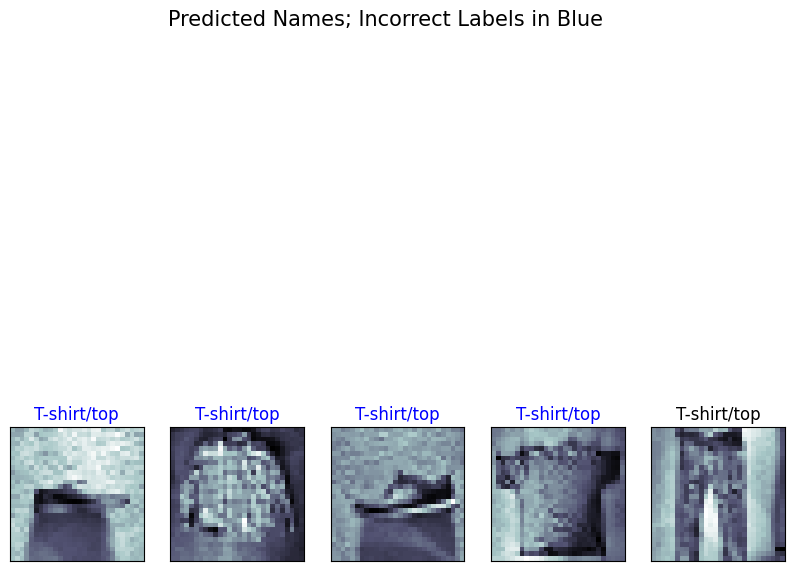

In [42]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y5_new_hat[i]]
                ,color='black' if y5_new_hat[i] == N_y_test[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

## 12.6. Random Forest

In [43]:
y_New_hat  = best_model.predict(N_X_test)

out_of_sample = accuracy_score(y_New_hat ,N_y_test, normalize = True) * 100
print()
print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
print(classification_report(N_y_test,y_New_hat))


Out-of-sample Accuracy:  20.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.20      1.00      0.33         1
           7       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.04      0.20      0.07         5
weighted avg       0.04      0.20      0.07         5



### Display Misclassified images with Predicted Labels

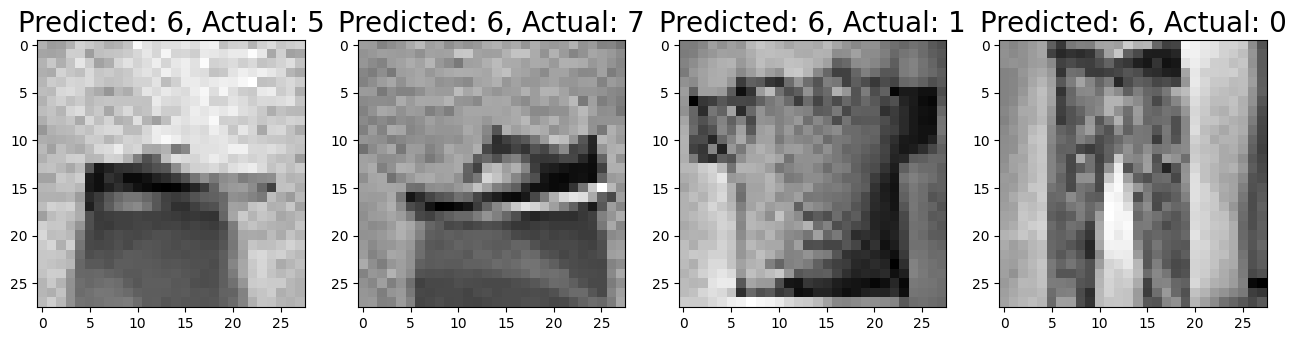

In [44]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y_New_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_New_hat[badIndex], N_y_test[badIndex]), fontsize = 20)

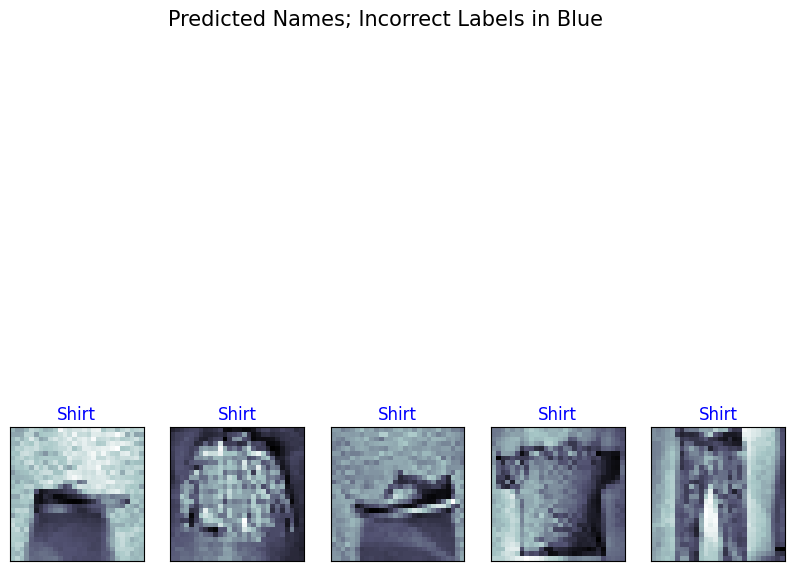

In [45]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y_New_hat[i]]
                ,color='black' if y_New_hat[i] == class_names[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

## 12.7. Neural Network

In [46]:
y4_new_hat = best_4_model.predict(N_X_test)

out_of_sample = accuracy_score(y4_new_hat ,N_y_test, normalize = True) * 100

print("Out-of-sample Accuracy: ", out_of_sample)

print()
print()
from sklearn.metrics import classification_report
print(classification_report(N_y_test, y4_new_hat))

Out-of-sample Accuracy:  0.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



### Display misclassified images with predicted labels

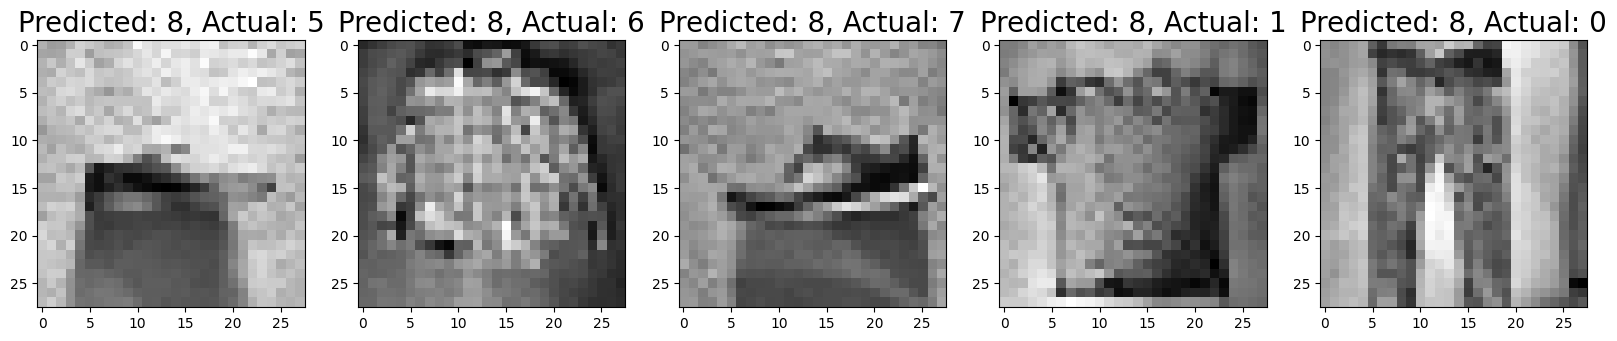

In [47]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(N_y_test, y4_new_hat):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(N_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y4_new_hat[badIndex], N_y_test[badIndex]), fontsize = 20)

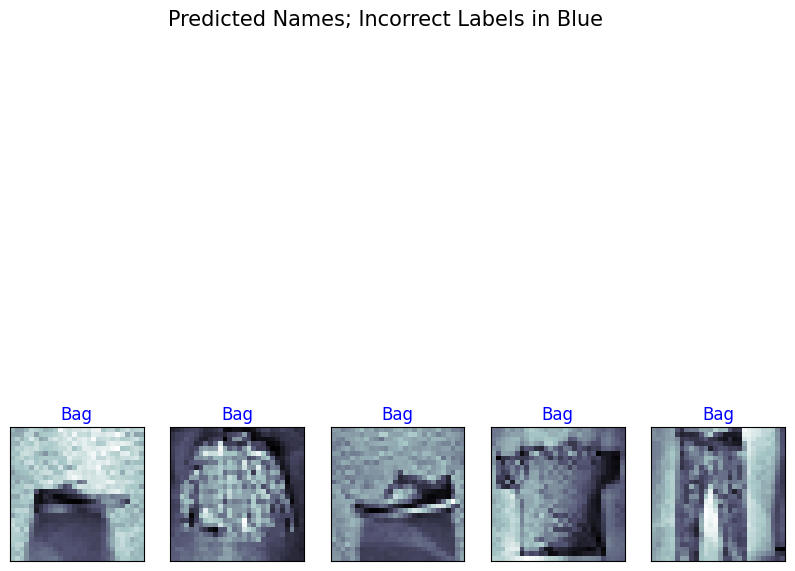

In [48]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(N_X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y4_new_hat[i]]
                ,color='black' if y4_new_hat[i] == class_names[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=15);

# Part 2 Conclusion

Out of seven models, three achieved an accuracy of 20%, while the remaining models had zero accuracy. However, out of the three models, only one, RandomForest, correctly predicted one of the labels. The poor results can be attributed to the quality of the images and the small size of the test set used for this project. As mentioned earlier, the test set was created manually. My pictures have shadows on one side, which differ from the images in the training set. You can create your own dataset to test and observe how the predictions might improve.